In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style("whitegrid")

In [6]:
conn = sqlite3.connect('crossvalidated.db')

In [7]:
# return all the records from posts table
query = "SELECT * FROM posts"

In [8]:
post_df = pd.read_sql_query(query, conn)

In [9]:
post_df.head()

,Body,ViewCount,LastEditorDisplayName,ClosedDate,CommunityOwnedDate,LastEditorUserId,ParentID,LastEditDate,CommentCount,AnswerCount,...,Score,OwnerDisplayName,Title,PostTypeId,OwnerUserId,Tags,CreationDate,FavoriteCount,Id,LastActivityDate
0,<p>How should I elicit prior distributions fro...,1850.0,None,None,None,NaN,NaN,None,1,5.0,...,31,None,Eliciting priors from experts,1,8.0,<bayesian><prior><elicitation>,2010-07-19T19:12:12.510,19.0,1,2010-09-15T21:08:26.077
1,<p>In many different statistical methods there...,15519.0,None,None,None,88.0,NaN,2010-08-07T17:56:44.800,1,7.0,...,26,None,What is normality?,1,24.0,<distributions><normality>,2010-07-19T19:12:57.157,9.0,2,2012-11-12T09:21:54.993
2,<p>What are some valuable Statistical Analysis...,5162.0,None,None,2010-07-19T19:13:28.577,183.0,NaN,2011-02-12T05:50:03.667,4,19.0,...,63,None,What are some valuable Statistical Analysis op...,1,18.0,<software><open-source>,2010-07-19T19:13:28.577,38.0,3,2013-05-27T14:48:36.927
3,<p>I have two groups of data. Each with a dif...,15443.0,None,None,None,NaN,NaN,None,2,5.0,...,15,None,Assessing the significance of differences in d...,1,23.0,<distributions><statistical-significance>,2010-07-19T19:13:31.617,4.0,4,2010-09-08T03:00:19.690
4,"<p>The R-project</p>\n\n<p><a href=""http://www...",NaN,None,None,2010-07-19T19:14:43.050,23.0,3.0,2010-07-19T19:21:15.063,3,NaN,...,84,None,None,2,23.0,None,2010-07-19T19:14:43.050,NaN,5,2010-07-19T19:21:15.063


In [11]:
post_df.shape

(151044, 21)

In [10]:
post_df.columns

Index([u'Body', u'ViewCount', u'LastEditorDisplayName', u'ClosedDate',
       u'CommunityOwnedDate', u'LastEditorUserId', u'ParentID',
       u'LastEditDate', u'CommentCount', u'AnswerCount', u'AcceptedAnswerId',
       u'Score', u'OwnerDisplayName', u'Title', u'PostTypeId', u'OwnerUserId',
       u'Tags', u'CreationDate', u'FavoriteCount', u'Id', u'LastActivityDate'],
      dtype='object')

In [25]:
posthist_df.columns

Index([u'Comment', u'CreationDate', u'UserDisplayName', u'RevisionGUID',
       u'UserId', u'PostId', u'PostHistoryTypeId', u'Id', u'Text'],
      dtype='object')

In [28]:
posthist_df.head()

,Comment,CreationDate,UserDisplayName,RevisionGUID,UserId,PostId,PostHistoryTypeId,Id,Text
0,None,2010-07-19T19:12:12.510,None,e58bf7fd-e60f-4c58-a6e4-dfc91cf98a69,8.0,1,2,1,How should I elicit prior distributions from e...
1,None,2010-07-19T19:12:12.510,None,e58bf7fd-e60f-4c58-a6e4-dfc91cf98a69,8.0,1,1,2,Eliciting priors from experts
2,None,2010-07-19T19:12:12.510,None,e58bf7fd-e60f-4c58-a6e4-dfc91cf98a69,8.0,1,3,3,<bayesian><prior><elicitation>
3,None,2010-07-19T19:12:57.157,None,18bf9150-f1cb-432d-b7b7-26d2f8e33581,24.0,2,2,4,In many different statistical methods there is...
4,None,2010-07-19T19:12:57.157,None,18bf9150-f1cb-432d-b7b7-26d2f8e33581,24.0,2,1,5,What is normality?


In [11]:
post_df.dtypes

Body                      object
ViewCount                float64
LastEditorDisplayName     object
ClosedDate                object
CommunityOwnedDate        object
LastEditorUserId         float64
ParentID                 float64
LastEditDate              object
CommentCount               int64
AnswerCount              float64
AcceptedAnswerId         float64
Score                      int64
OwnerDisplayName          object
Title                     object
PostTypeId                 int64
OwnerUserId              float64
Tags                      object
CreationDate              object
FavoriteCount            float64
Id                         int64
LastActivityDate          object
dtype: object

In [12]:
post_df.describe()

,ViewCount,LastEditorUserId,ParentID,CommentCount,AnswerCount,AcceptedAnswerId,Score,PostTypeId,OwnerUserId,FavoriteCount,Id
count,75067.000000,72500.000000,74331.000000,151044.000000,75067.000000,23818.000000,151044.000000,151044.000000,149271.000000,22850.000000,151044.000000
mean,816.843660,22134.436566,83680.391479,1.922029,0.990195,90904.345117,2.736117,1.530408,31738.179479,2.731116,98085.845171
std,4281.584173,25574.054081,59199.273110,2.662302,1.336717,58499.459081,5.921776,0.590355,29888.893801,7.726070,59672.239119
min,2.000000,-1.000000,1.000000,0.000000,0.000000,5.000000,-35.000000,1.000000,-1.000000,0.000000,1.000000
25%,46.000000,2116.000000,29330.500000,0.000000,0.000000,37654.750000,0.000000,1.000000,6553.000000,1.000000,45750.750000
50%,118.000000,11032.000000,76590.000000,1.000000,1.000000,86705.500000,1.000000,2.000000,22452.000000,1.000000,95794.500000
75%,404.000000,31379.000000,134031.500000,3.000000,1.000000,141417.250000,3.000000,2.000000,52615.000000,2.000000,151788.250000
max,293679.000000,107565.000000,200147.000000,45.000000,143.000000,200143.000000,334.000000,7.000000,107587.000000,389.000000,200182.000000


In [13]:
#check columns with missing values 
pd.isnull(post_df).any()

Body                     False
ViewCount                 True
LastEditorDisplayName     True
ClosedDate                True
CommunityOwnedDate        True
LastEditorUserId          True
ParentID                  True
LastEditDate              True
CommentCount             False
AnswerCount               True
AcceptedAnswerId          True
Score                    False
OwnerDisplayName          True
Title                     True
PostTypeId               False
OwnerUserId               True
Tags                      True
CreationDate             False
FavoriteCount             True
Id                       False
LastActivityDate         False
dtype: bool

In [15]:
pd.isnull(post_df).sum()

Body                          0
ViewCount                 75977
LastEditorDisplayName    150480
ClosedDate               147372
CommunityOwnedDate       147907
LastEditorUserId          78544
ParentID                  76713
LastEditDate              78033
CommentCount                  0
AnswerCount               75977
AcceptedAnswerId         127226
Score                         0
OwnerDisplayName         147467
Title                     75977
PostTypeId                    0
OwnerUserId                1773
Tags                      75977
CreationDate                  0
FavoriteCount            128194
Id                            0
LastActivityDate              0
dtype: int64

In [19]:
post_df.drop(['LastEditorDisplayName','CommunityOwnedDate','LastEditorUserId','LastEditDate',
             'LastActivityDate'],axis=1,inplace=True)

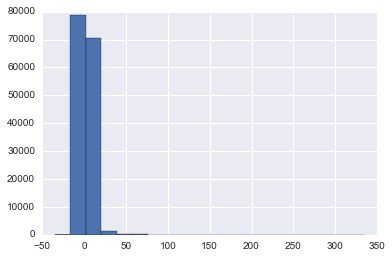

In [19]:
post_df['Score'].hist(bins=20)

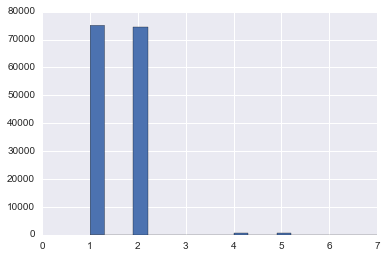

In [20]:
post_df['PostTypeId'].hist(bins=20)

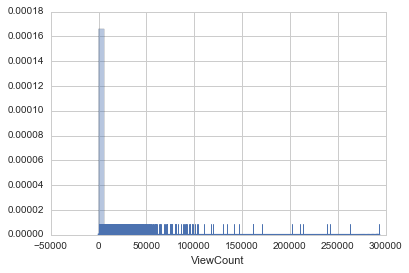

In [17]:
sns.distplot(post_df['ViewCount'].dropna(), rug=True)

In [20]:
post_df.columns

Index([u'Body', u'ViewCount', u'ClosedDate', u'ParentID', u'CommentCount',
       u'AnswerCount', u'AcceptedAnswerId', u'Score', u'OwnerDisplayName',
       u'Title', u'PostTypeId', u'OwnerUserId', u'Tags', u'CreationDate',
       u'FavoriteCount', u'Id'],
      dtype='object')

In [21]:
pd.isnull(post_df).sum()

Body                     0
ViewCount            75977
ClosedDate          147372
ParentID             76713
CommentCount             0
AnswerCount          75977
AcceptedAnswerId    127226
Score                    0
OwnerDisplayName    147467
Title                75977
PostTypeId               0
OwnerUserId           1773
Tags                 75977
CreationDate             0
FavoriteCount       128194
Id                       0
dtype: int64

In [65]:
qpost_df = post_df[post_df.PostTypeId==1]  #posts for questions

In [66]:
qpost_df.shape

(75067, 16)

In [86]:
import pickle
with open('QuesPosts.pickle', 'wb') as handle:
    pickle.dump(qpost_df, handle)

In [85]:
#Quality classes of the questions in our dataset.

In [71]:
postA = qpost_df[(qpost_df.ClosedDate.isnull()) & (qpost_df.Score>=6)]

In [72]:
postA.shape

(6933, 16)

In [73]:
postB = qpost_df[(qpost_df.ClosedDate.isnull()) & (qpost_df.Score>=1) & (qpost_df.Score<=5)]

In [74]:
postB.shape

(42336, 16)

In [79]:
postC = qpost_df[(qpost_df.ClosedDate.isnull()) & (qpost_df.Score==0)]

In [80]:
postC.shape

(21598, 16)

In [81]:
postD = qpost_df[(qpost_df.ClosedDate.isnull()) & (qpost_df.Score<0)]

In [82]:
postD.shape

(528, 16)

In [83]:
postE = qpost_df[qpost_df.ClosedDate.notnull()]

In [84]:
postE.shape

(3672, 16)